# Data Cleaning and Preprocessing

In [492]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [493]:
df = pd.read_csv('../../data/raw/laptop_data.csv')

In [494]:
df.head()

,Unnamed: 0,Brand,Name,Price,Processor_Name,Processor_Brand,RAM_Expandable,RAM,RAM_TYPE,Ghz,Display_type,Display,GPU,GPU_Brand,SSD,HDD,Adapter,Battery_Life
0,0,HP,HP Chromebook 11A-NA0002MU (2E4N0PA) Laptop (1...,22990,MediaTek Octa-core,MediaTek,Not Expandable,4 GB,DDR4 RAM,2.0 Ghz Processor,LED,11.6,Integrated Graphics,MediaTek,64 GB SSD Storage,No HDD,45,Upto 12 Hrs Battery Life
1,1,Lenovo,Lenovo Ideapad Slim 3 (82KU017KIN) Laptop (15....,36289,AMD Hexa-Core Ryzen 5,AMD,12 GB Expandable,8 GB,DDR4 RAM,4.0 Ghz Processor,LCD,15.6,Radeon,AMD,512 GB SSD Storage,No HDD,65,Upto 11 Hrs Battery Life
2,3,Dell,Dell G15-5520 (D560822WIN9B) Laptop (15.6 Inch...,78500,Intel Core i5 (12th Gen),Intel,32 GB Expandable,16 GB,DDR5 RAM,3.3 Ghz Processor,LCD,15.6,"GeForce RTX 3050 GPU, 4 GB",NVIDIA,512 GB SSD Storage,No HDD,56,Upto 10 Hrs Battery Life
3,4,HP,HP 15s-fy5007TU (91R03PA) Laptop (15.6 Inch | ...,55490,Intel Core i5 (12th Gen),Intel,8 GB Expandable,8 GB,DDR4 RAM,4.2 Ghz Processor,LCD,15.6,Iris Xe,Intel,512 GB SSD Storage,No HDD,no,Upto 7.30 Hrs Battery Life
4,6,Infinix,Infinix Inbook Y2 Plus XL29 Laptop (15.6 Inch ...,21990,Intel Core i3 (11th Gen),Intel,Not Expandable,8 GB LP,LPDDR4X RAM,1.7 Ghz Processor,LCD,15.6,UHD,Intel,512 GB SSD Storage,No HDD,45,Upto 8 Hrs Battery Life


In [495]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3976 entries, 0 to 3975
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Unnamed: 0       3976 non-null   int64 
 1   Brand            3976 non-null   object
 2   Name             3976 non-null   object
 3   Price            3976 non-null   int64 
 4   Processor_Name   3976 non-null   object
 5   Processor_Brand  3976 non-null   object
 6   RAM_Expandable   3976 non-null   object
 7   RAM              3976 non-null   object
 8   RAM_TYPE         3976 non-null   object
 9   Ghz              3976 non-null   object
 10  Display_type     3976 non-null   object
 11  Display          3976 non-null   object
 12  GPU              3968 non-null   object
 13  GPU_Brand        3972 non-null   object
 14  SSD              3976 non-null   object
 15  HDD              3976 non-null   object
 16  Adapter          3976 non-null   object
 17  Battery_Life     3558 non-null   

### Remove unnecessary coulmn 'Unnamed: 0'

In [496]:
df.shape

(3976, 18)

In [497]:
df = df.drop(columns=['Unnamed: 0', 'Name'])

In [498]:
df.head()

,Brand,Price,Processor_Name,Processor_Brand,RAM_Expandable,RAM,RAM_TYPE,Ghz,Display_type,Display,GPU,GPU_Brand,SSD,HDD,Adapter,Battery_Life
0,HP,22990,MediaTek Octa-core,MediaTek,Not Expandable,4 GB,DDR4 RAM,2.0 Ghz Processor,LED,11.6,Integrated Graphics,MediaTek,64 GB SSD Storage,No HDD,45,Upto 12 Hrs Battery Life
1,Lenovo,36289,AMD Hexa-Core Ryzen 5,AMD,12 GB Expandable,8 GB,DDR4 RAM,4.0 Ghz Processor,LCD,15.6,Radeon,AMD,512 GB SSD Storage,No HDD,65,Upto 11 Hrs Battery Life
2,Dell,78500,Intel Core i5 (12th Gen),Intel,32 GB Expandable,16 GB,DDR5 RAM,3.3 Ghz Processor,LCD,15.6,"GeForce RTX 3050 GPU, 4 GB",NVIDIA,512 GB SSD Storage,No HDD,56,Upto 10 Hrs Battery Life
3,HP,55490,Intel Core i5 (12th Gen),Intel,8 GB Expandable,8 GB,DDR4 RAM,4.2 Ghz Processor,LCD,15.6,Iris Xe,Intel,512 GB SSD Storage,No HDD,no,Upto 7.30 Hrs Battery Life
4,Infinix,21990,Intel Core i3 (11th Gen),Intel,Not Expandable,8 GB LP,LPDDR4X RAM,1.7 Ghz Processor,LCD,15.6,UHD,Intel,512 GB SSD Storage,No HDD,45,Upto 8 Hrs Battery Life


In [499]:
df.shape

(3976, 16)

### Drop Duplicate Rows

In [500]:
df[df.duplicated()]

,Brand,Price,Processor_Name,Processor_Brand,RAM_Expandable,RAM,RAM_TYPE,Ghz,Display_type,Display,GPU,GPU_Brand,SSD,HDD,Adapter,Battery_Life
444,ASUS,42990,Intel Core i3 (13th Gen),Intel,16 GB Expandable,8 GB,DDR4 RAM,1.2 Ghz Processor,LCD,15.6,UHD,Intel,512 GB SSD Storage,No HDD,45,Upto 6 Hrs Battery Life
445,ASUS,42990,Intel Core i3 (13th Gen),Intel,16 GB Expandable,8 GB,DDR4 RAM,1.2 Ghz Processor,LCD,15.6,UHD,Intel,512 GB SSD Storage,No HDD,45,Upto 6 Hrs Battery Life
619,Acer,70990,Intel Core i5 (13th Gen) Processor,Intel,32 GB Expandable,16 GB,DDR5 RAM,0,LCD,15.6,"GeForce RTX 3050 GPU, 6 GB",NVIDIA,512 GB SSD Storage,No HDD,135,135W Adapter
653,Microsoft,99990,Intel Core i5 (12th Gen),Intel,8 GB Expandable,8 GB LP,LPDDR5 RAM,4.2 Ghz Processor,LCD,13,Integrated,Intel,256 GB SSD Storage,No HDD,65,Upto 15.5 Hrs Battery Life
896,ASUS,201990,AMD Octa-Core Ryzen 9,AMD,Not Expandable,16 GB,DDR5 RAM,4.8 Ghz Processor,LCD,15.6,"GeForce RTX 3070 Ti GPU, 8 GB",NVIDIA,1024 GB SSD Storage,No HDD,65,65W Adapter
1032,ASUS,69990,Intel Core i5 (12th Gen),Intel,Not Expandable,16 GB,DDR4 RAM,2.5 Ghz Processor,LCD,16,"GeForce RTX 2050 GPU, 4 GB",NVIDIA,512 GB SSD Storage,No HDD,120,120W Adapter
1315,ASUS,58990,Intel Core i5 (13th Gen),Intel,Not Expandable,16 GB,DDR4 RAM,1.3 Ghz Processor,LCD,15.6,Iris Xe,Intel,512 GB SSD Storage,No HDD,45,Upto 6 Hrs Battery Life
1574,ASUS,81990,Intel Core i7 (8th Gen),Intel,Not Expandable,8 GB,DDR4 RAM,1.8 Ghz Processor,LED,14,"GeForce MX150 GPU, 2 GB",NVIDIA,256 GB SSD Storage,1024 GB HDD Storage,42,42W Adapter
1813,ASUS,64990,Intel Core i5 (8th Gen),Intel,Not Expandable,8 GB,DDR4 RAM,1.6 Ghz Processor,LED,14,UHD 620,Intel,256 GB SSD Storage,1024 GB HDD Storage,42,42W Adapter
1817,ASUS,64990,Intel Core i5 (8th Gen),Intel,Not Expandable,8 GB,DDR4 RAM,1.6 Ghz Processor,LED,14,UHD 620,Intel,256 GB SSD Storage,1024 GB HDD Storage,42,42W Adapter


In [501]:
df.drop_duplicates(inplace=True)

In [502]:
df[df.duplicated()]

,Brand,Price,Processor_Name,Processor_Brand,RAM_Expandable,RAM,RAM_TYPE,Ghz,Display_type,Display,GPU,GPU_Brand,SSD,HDD,Adapter,Battery_Life


In [503]:
df.shape

(3949, 16)

### Clean by Feature

In [504]:
df.head()

,Brand,Price,Processor_Name,Processor_Brand,RAM_Expandable,RAM,RAM_TYPE,Ghz,Display_type,Display,GPU,GPU_Brand,SSD,HDD,Adapter,Battery_Life
0,HP,22990,MediaTek Octa-core,MediaTek,Not Expandable,4 GB,DDR4 RAM,2.0 Ghz Processor,LED,11.6,Integrated Graphics,MediaTek,64 GB SSD Storage,No HDD,45,Upto 12 Hrs Battery Life
1,Lenovo,36289,AMD Hexa-Core Ryzen 5,AMD,12 GB Expandable,8 GB,DDR4 RAM,4.0 Ghz Processor,LCD,15.6,Radeon,AMD,512 GB SSD Storage,No HDD,65,Upto 11 Hrs Battery Life
2,Dell,78500,Intel Core i5 (12th Gen),Intel,32 GB Expandable,16 GB,DDR5 RAM,3.3 Ghz Processor,LCD,15.6,"GeForce RTX 3050 GPU, 4 GB",NVIDIA,512 GB SSD Storage,No HDD,56,Upto 10 Hrs Battery Life
3,HP,55490,Intel Core i5 (12th Gen),Intel,8 GB Expandable,8 GB,DDR4 RAM,4.2 Ghz Processor,LCD,15.6,Iris Xe,Intel,512 GB SSD Storage,No HDD,no,Upto 7.30 Hrs Battery Life
4,Infinix,21990,Intel Core i3 (11th Gen),Intel,Not Expandable,8 GB LP,LPDDR4X RAM,1.7 Ghz Processor,LCD,15.6,UHD,Intel,512 GB SSD Storage,No HDD,45,Upto 8 Hrs Battery Life


#### Brand

In [505]:
print("Brand Unique Values:", df['Brand'].nunique())
print("Missing Brand values:", df['Brand'].isna().sum())
print(df['Brand'].value_counts())

Brand Unique Values: 31
Missing Brand values: 0
Brand
ASUS         976
Lenovo       808
HP           799
Dell         420
Acer         317
MSI          316
Samsung       61
Apple         48
Infinix       39
Microsoft     33
AVITA         23
Gigabyte      17
LG            15
Honor         14
iball         11
Xiaomi        10
Fujitsu        8
Zebronics      8
Wings          4
Colorful       3
Realme         3
Micromax       3
Coconics       3
Tecno          2
Smartron       2
Huawei         1
Razer          1
VAIO           1
Lava           1
Nokia          1
RDP            1
Name: count, dtype: int64


In [506]:
# Here I can consider low quantity brands as "Other" category
top_brands = ['ASUS', 'Lenovo', 'HP', 'Dell', 'Acer', 'MSI']
df['Brand'] = df['Brand'].apply(lambda x: x if x in top_brands else 'Other')


In [507]:
print(df['Brand'].value_counts())

Brand
ASUS      976
Lenovo    808
HP        799
Dell      420
Acer      317
MSI       316
Other     313
Name: count, dtype: int64


#### Price


In [508]:
df.shape

(3949, 16)

In [509]:
print("Price Unique Values:", df['Price'].nunique())
print("Missing Price values:", df['Price'].isna().sum())
print(df['Price'].value_counts())
print((df['Price'] == 0).any())    

Price Unique Values: 1799
Missing Price values: 0
Price
64990     40
49990     38
79990     38
34990     37
42990     36
          ..
48890      1
74390      1
51891      1
112980     1
36289      1
Name: count, Length: 1799, dtype: int64
False


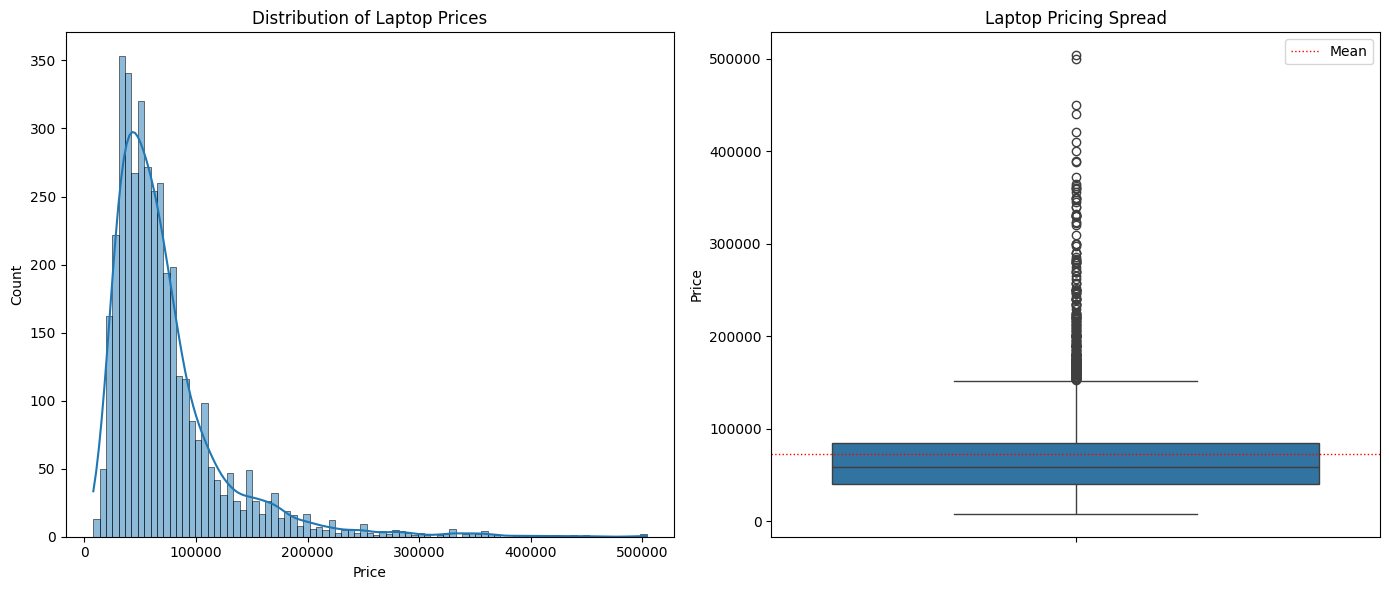

In [510]:

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

mean_price = df['Price'].mean()
sns.histplot(df['Price'], kde=True, ax=axes[0])
axes[0].set_title('Distribution of Laptop Prices')

sns.boxplot(data=df, y='Price', ax=axes[1])
axes[1].set_title('Laptop Pricing Spread')
axes[1].set_ylabel('Price')

axes[1].axhline(mean_price, color='red', linestyle=':', linewidth=1, label='Mean')
axes[1].legend()

plt.tight_layout()
plt.show()

##### Removing Outliars ( Not Finalized)

In [511]:
Q1 = df['Price'].quantile(0.25)
Q3 = df['Price'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df = df[(df['Price'] >= lower_bound) & (df['Price'] <= upper_bound)]


In [512]:
df.shape

(3670, 16)

##### Converting IND RS to LKR

In [513]:
df['Price'] = df['Price'] * 3.5 # Get Average Exchange Rate

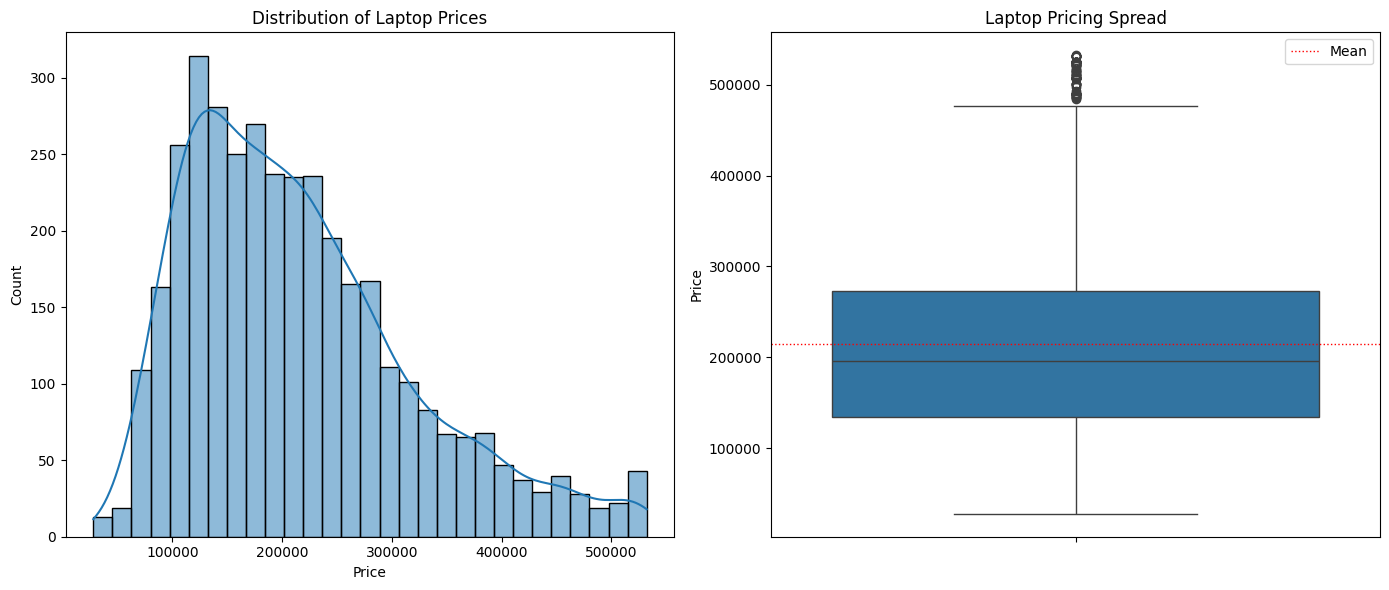

In [514]:

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

mean_price = df['Price'].mean()
sns.histplot(df['Price'], kde=True, ax=axes[0])
axes[0].set_title('Distribution of Laptop Prices')

sns.boxplot(data=df, y='Price', ax=axes[1])
axes[1].set_title('Laptop Pricing Spread')
axes[1].set_ylabel('Price')

axes[1].axhline(mean_price, color='red', linestyle=':', linewidth=1, label='Mean')
axes[1].legend()

plt.tight_layout()
plt.show()

In [515]:
df.shape

(3670, 16)

In [516]:
print(df['Brand'].value_counts())

Brand
ASUS      889
Lenovo    772
HP        766
Dell      399
Acer      310
Other     271
MSI       263
Name: count, dtype: int64


#### Processor Brand

In [517]:
print("Processor_Brand Unique Values:", df['Processor_Brand'].nunique())
print("Missing Processor_Brand values:", df['Processor_Brand'].isna().sum())
df['Processor_Brand'].value_counts()

Processor_Brand Unique Values: 17
Missing Processor_Brand values: 0


Processor_Brand
Intel        2754
AMD           880
Apple          11
MediaTek        4
1.7             4
2.4             2
2.0             2
3.0             2
3.4             2
2.1             2
1.6             1
Qualcomm        1
3.3             1
2.2             1
1.8             1
Microsoft       1
1.9             1
Name: count, dtype: int64

* Some Processors_Brands names have Ghz speeds as a wrong input. So we can remove those values.


In [518]:
# Here only consider Intel and AMD
df['Processor_Brand'].info

<bound method Series.info of 0       MediaTek
1            AMD
2          Intel
3          Intel
4          Intel
          ...   
3971       Intel
3972       Intel
3973         AMD
3974         AMD
3975       Intel
Name: Processor_Brand, Length: 3670, dtype: object>

In [519]:
df.shape

(3670, 16)

In [520]:
valid_processors = ['Intel', 'AMD', 'Apple', 'MediaTek', 'Qualcomm', 'Microsoft']
df = df[df['Processor_Brand'].isin(valid_processors)]

In [521]:
df.shape

(3651, 16)

In [522]:
df['Processor_Brand'].value_counts()

Processor_Brand
Intel        2754
AMD           880
Apple          11
MediaTek        4
Qualcomm        1
Microsoft       1
Name: count, dtype: int64

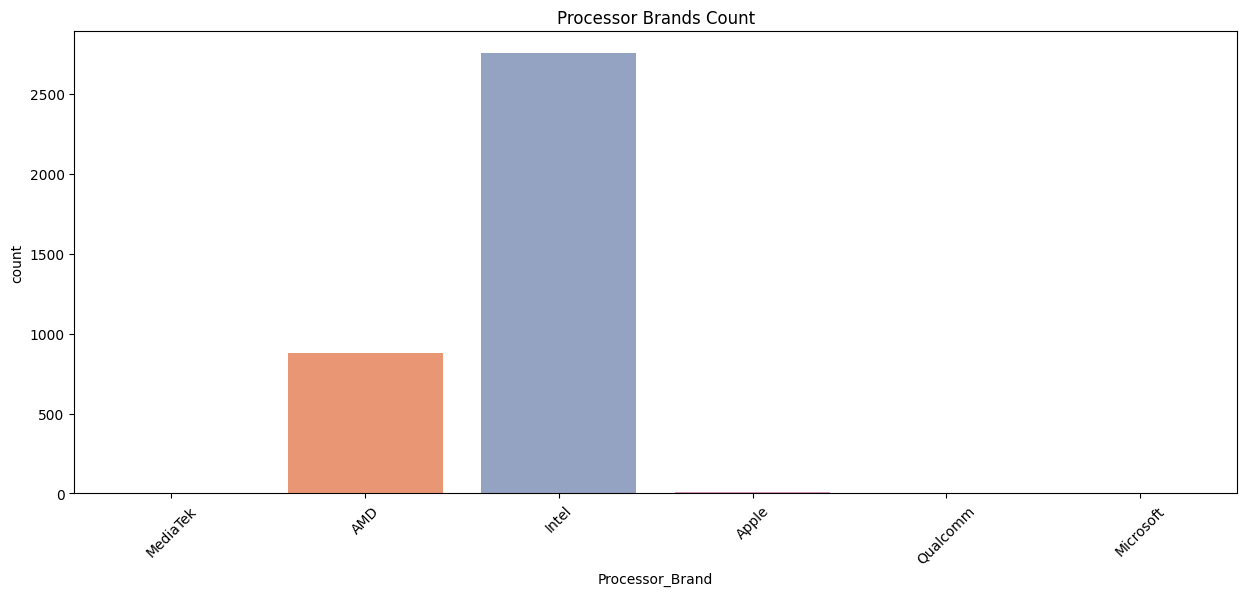

In [523]:
plt.figure(figsize=(15, 6))
sns.countplot(data=df, x='Processor_Brand', hue='Processor_Brand', palette='Set2')
plt.xticks(rotation=45)
plt.title("Processor Brands Count")
plt.show()

In [524]:
print(df['Processor_Brand'].value_counts(normalize=True) * 100)

Processor_Brand
Intel        75.431389
AMD          24.102985
Apple         0.301287
MediaTek      0.109559
Qualcomm      0.027390
Microsoft     0.027390
Name: proportion, dtype: float64


* Intel and AMD are the prominant. reset can be ignore/drop 

In [525]:
print(df.shape)
top_processor = ['Intel', 'AMD']
df = df[df['Processor_Brand'].isin(top_processor)]
print(df.shape)
df['Processor_Brand'].value_counts()

(3651, 16)
(3634, 16)


Processor_Brand
Intel    2754
AMD       880
Name: count, dtype: int64

#### RAM

In [526]:
print("RAM Unique Values:", df['RAM'].nunique())
print("Missing RAM values:", df['RAM'].isna().sum())
df['RAM'].value_counts()

RAM Unique Values: 16
Missing RAM values: 0


RAM
8 GB          1596
16 GB          970
4 GB           534
16 GB LP       253
8 GB LP        172
4 GB LP         33
2 GB            22
32 GB LP        21
16 GB RAM       10
32 GB            7
8 GB RAM         6
12 GB            4
16 GB RAM        2
3 GB             2
24 GB            1
6 GB             1
Name: count, dtype: int64

In [527]:
df.shape

(3634, 16)

In [528]:
df['RAM'] = df['RAM'].str.replace('RAM', '', regex=False)
df['RAM'] = df['RAM'].str.replace('LP', '', regex=False)
df['RAM'] = df['RAM'].str.replace('GB', '', regex=False)
df['RAM'] = df['RAM'].str.strip().astype(int)

In [529]:
df['RAM'].value_counts()

RAM
8     1774
16    1235
4      567
32      28
2       22
12       4
3        2
24       1
6        1
Name: count, dtype: int64

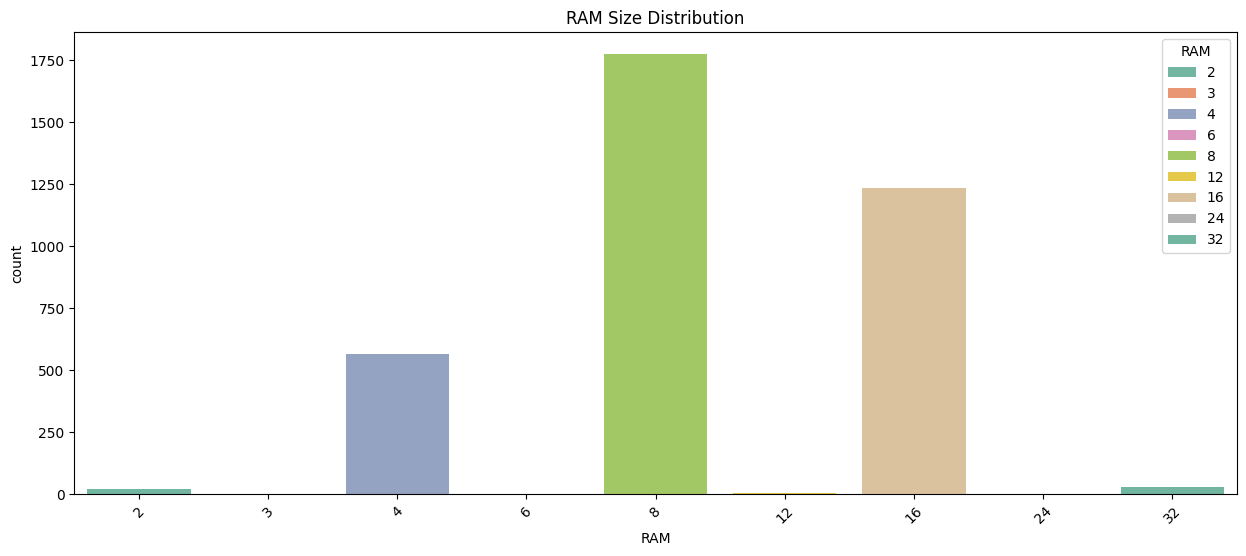

In [530]:
plt.figure(figsize=(15, 6))
sns.countplot(data=df, x='RAM', hue='RAM', palette='Set2')
plt.xticks(rotation=45)
plt.title("RAM Size Distribution")
plt.show()

In [531]:
standard_ram_sizes = [4, 8, 16, 32]
df = df[df['RAM'].isin(standard_ram_sizes)]
df.shape

(3604, 16)

In [532]:
df['RAM'].value_counts()

RAM
8     1774
16    1235
4      567
32      28
Name: count, dtype: int64

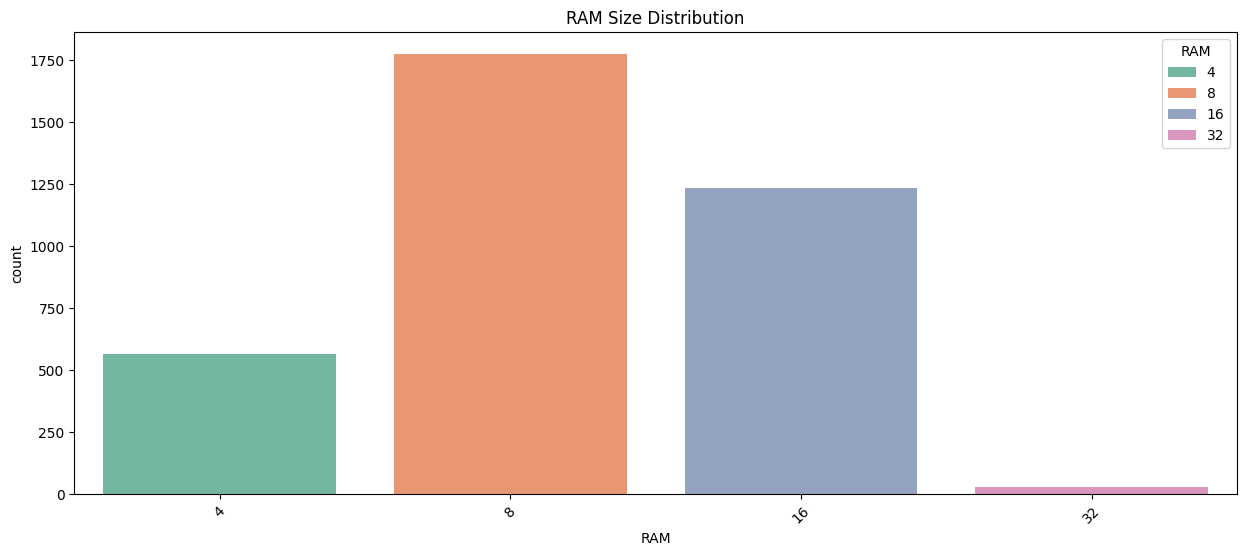

In [533]:
plt.figure(figsize=(15, 6))
sns.countplot(data=df, x='RAM', hue='RAM', palette='Set2')
plt.xticks(rotation=45)
plt.title("RAM Size Distribution")
plt.show()

#### RAM Type

In [534]:
print("RAM_TYPE Unique Values:", df['RAM_TYPE'].nunique())
print("Missing RAM_TYPE values:", df['RAM_TYPE'].isna().sum())
df['RAM_TYPE'].value_counts()

RAM_TYPE Unique Values: 19
Missing RAM_TYPE values: 0


RAM_TYPE
DDR4 RAM        1454
DDR4 RAM        1272
DDR5 RAM         170
LPDDR4X RAM      118
LPDDR5 RAM       118
DDR5 RAM          91
LPDDR5 RAM        88
DDR3 RAM          67
DDR3 RAM          52
LPDDR3 RAM        43
LPDDR4X RAM       31
LPDDR5X RAM       28
LPDDR4 RAM        25
LPDDR5X RAM       20
RAM               16
LPDDR4 RAM         6
RAM                2
LPDDR3 RAM         2
DDR2 RAM           1
Name: count, dtype: int64

In [535]:
df.shape

(3604, 16)

In [ ]:

df['RAM_TYPE'] = (
    df['RAM_TYPE']
    .astype(str)
    .str.upper()                             
    .str.replace(r'\s+', ' ', regex=True)    
    .str.strip()                            
)


df = df[df['RAM_TYPE'] != 'RAM']


df['RAM_TYPE'] = df['RAM_TYPE'].replace({
    'DDR4 RAM': 'DDR4',
    'LPDDR4 RAM': 'DDR4',
    'LPDDR4X RAM': 'DDR4',

    'DDR5 RAM': 'DDR5',
    'LPDDR5 RAM': 'DDR5',
    'LPDDR5X RAM': 'DDR5',

    'DDR3 RAM': 'DDR3',
    'LPDDR3 RAM': 'DDR3',

    'DDR2 RAM': 'DDR2'
})


In [537]:
df.shape

(3586, 16)

In [538]:
df['RAM_TYPE'].value_counts()

RAM_TYPE
DDR4    2906
DDR5     515
DDR3     164
DDR2       1
Name: count, dtype: int64

In [542]:
df = df[df['RAM_TYPE'] != 'DDR2']
df['RAM_TYPE'].value_counts()

RAM_TYPE
DDR4    2906
DDR5     515
DDR3     164
Name: count, dtype: int64

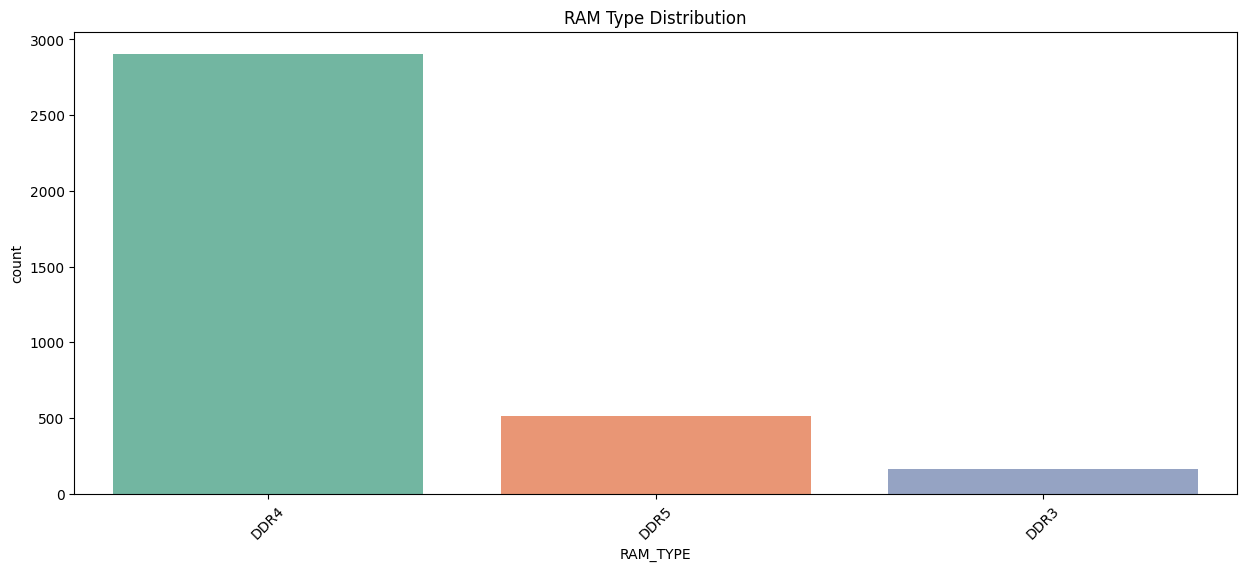

In [543]:
plt.figure(figsize=(15, 6))
sns.countplot(data=df, x='RAM_TYPE', hue='RAM_TYPE', palette='Set2')
plt.xticks(rotation=45)
plt.title("RAM Type Distribution")
plt.show()